1. IMPORT THE NECESSARY LIBRARIES. 

In [17]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from tqdm import tqdm

2. LOAD AND PREPROCESS IMAGES.  

In [20]:
#Set directories. 
train_dir = "C:/Users/HP/Desktop/PRODIGY_ML_03/dogs-vs-cats/train"

CATEGORIES = ['Cat', 'Dog']
IMG_SIZE = 64  #Resizing images to 64x64 for svm. 

def load_images_and_labels(directory, categories, img_size): 
    data = []
    labels = []
    for category in categories:
        path = os.path.join(directory, category)
        class_label = categories.index(category)

        for img_name in os.listdir(path): 
            try: 
                img_path = os.path.join(path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                resized_img = cv2.resize(img, (img_size, img_size))
                data.append(resized_img)
                labels.append(class_label)
            except Exception as e:
                print(f"Error loading image {img_name}: {e}")
    
    #Converting to numpy array. 
    data = np.array(data).reshape(-1, img_size * img_size)  #Flatten for SVM. 
    labels = np.array(labels)

    return data, labels

In [21]:
#Load images and labels. 
data, labels = load_images_and_labels(train_dir, CATEGORIES, IMG_SIZE)

In [22]:
#Split into train and validation sets. 
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size= 0.2, random_state = 42)

3. TRAIN THE SVM CLASSIFIER. 

In [28]:
#Initialize the SVM Classifier. 
svm_clif = SVC(kernel = 'linear') #Using a linear Kernel. 

In [29]:
#Training the classifier.
x_train_subset = x_train[:100]
y_train_subset = y_train[:100]
svm_clif.fit(x_train_subset, y_train_subset)

SVC(kernel='linear')

In [30]:
#Predict on validation set. 
y_pred = svm_clif.predict(x_val)

In [31]:
#Calculating the accuracy. 
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Validation Accuracy: 54.20%


4. PLOT TRAINING RESULTS. 


Since, SVM training doesn't involve epochs or a history object, we can plot the accuracy directly or compare training and validation accuracy over multiple models or confogurations. 

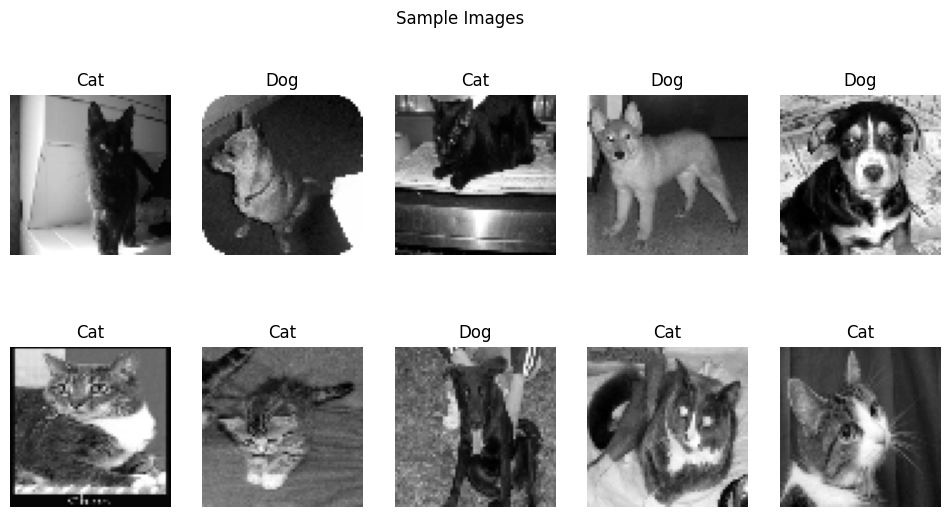

In [34]:
def plot_sample_images(data, labels, categories, img_size): 
    '''Function to plot the sample images'''
    fig, axes = plt.subplots(2, 5, figsize = (12, 6))
    fig.suptitle("Sample Images")
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(img_size, img_size), cmap='gray')
        ax.set_title(categories[labels[i]])
        ax.set_axis_off()

plot_sample_images(x_val, y_val, CATEGORIES, IMG_SIZE)

5. FEATURE EXTRACTION via HOG. 


Instead of flattening raw pixels, we could use HOG to extract features before training the SVM. 

In [35]:
from skimage.feature import hog

def extract_hog_features(data, img_size):
    hog_features = []
    for img in data:
        img_reshaped = img.reshape((img_size, img_size))
        features, hog_image = hog(img_reshaped, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

In [36]:
#Extract HOG features. 
x_train_hog = extract_hog_features(x_train, IMG_SIZE)
x_val_hog = extract_hog_features(x_val, IMG_SIZE)

In [37]:
#Train SVM with HOG features. 
svm_clif_hog = SVC(kernel = 'linear')
svm_clif_hog.fit(x_train_hog, y_train)

SVC(kernel='linear')

In [38]:
#Predict and evaluate. 
y_pred_hog = svm_clif_hog.predict(x_val_hog)
accuracy_hog = accuracy_score(y_val, y_pred_hog)
print(f"HOG-based Validation Accuracy: {accuracy_hog * 100:.2f}%")

HOG-based Validation Accuracy: 71.84%
